In [63]:
import numpy as np
import pandas as pd

In [81]:
names = ["age", "workclass", "fnlwgt", "education", "educationNr", "maritalStatus",
        "occupation", "relationship", "race", "sex", "capitalGain", "capitalLoss", 
         "hoursPerWeek", "nativeCountry", "salary"]


complete = pd.read_csv("complete.data", header = None, sep = " ", na_values = ["?"],
                       names = names)
complete.head(2)
complete.tail(20)
# complete.salary.value_counts()

,age,workclass,fnlwgt,education,educationNr,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K
48823,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
48824,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
48825,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48827,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
48828,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
48829,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48830,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
48831,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [65]:
complete.isnull().sum()

age                 0
workclass        2799
fnlwgt              0
education           0
educationNr         0
maritalStatus       0
occupation       2809
relationship        0
race                0
sex                 0
capitalGain         0
capitalLoss         0
hoursPerWeek        0
nativeCountry     857
salary              0
dtype: int64

In [72]:
(complete["nativeCountry"] == "Outlying-US(Guam-USVI-etc)").any()

True

In [87]:
# complete.drop(labels = "education", axis = 1, inplace = True)
# complete_num = pd.get_dummies(complete, columns = ["workclass", "educationNr", "maritalStatus",
#         "occupation", "relationship", "race", "sex", "nativeCountry", "salary"],
#                              dummy_na = True) 
# complete_num.head()
# complete_num.columns

complete["country_typeI"] = complete["nativeCountry"].isin(["United-States",
            "England", "Canada", "Outlying-US(Guam-USVI-etc)", "Japan", "Greece", "South",
                "Italy", "Portugal", "Ireland", "France", "Taiwan", "Scotland",
                    "Hong", "Holand-Netherlands"]) * 1
complete["country_typeI"].value_counts()
complete["nationals"] = (complete["nativeCountry"] == "United-States") * 1
complete["nationals"].value_counts()
print(complete["educationNr"].value_counts())
print(complete["education"].value_counts())


9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educationNr, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


In [136]:
def numericEducation (x):
    if x in range(1, 5): 
        return 0 
    elif x in range(5, 9): 
        return 0.03125
    elif x == 9: 
        return 0.0625
    elif x in range(10, 13): 
        return 0.125
    elif x == 13: 
        return 0.25
    elif x == 14: 
        return 0.5
    elif x in range (15, 17):
        return 1
    else:
        return np.nan


complete["educationGeneral"] = complete["educationNr"].map(numericEducation)
complete["educationGeneral"].value_counts()
#complete["educationNr"].tail(10)

0.06250    15784
0.12500    14540
0.25000     8025
0.03125     4614
0.50000     2657
0.00000     1794
1.00000     1428
Name: educationGeneral, dtype: int64

In [135]:
complete.loc[complete['educationNr'] == 15, "salary"].value_counts()

>50K     617
<=50K    217
Name: salary, dtype: int64

In [77]:
complete.nativeCountry.value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [46]:
namesNoCountry = names
namesNoCountry.pop(-2)


nomissing =  pd.read_csv("nomissing.data", header = None, sep = " ", names = namesNoCountry)
nomissing.head()
# nomissing.tail()
# print(nomissing.shape)
# print(48841 * .93)
# print(nomissing.isnull().any())
# print(nomissing["salary"].value_counts())

,age,workclass,fnlwgt,education,educationNr,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [34]:
train =  pd.read_csv("train.data", header = None, sep = " ", na_values = ["?"], names = names)
train.tail()
train.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

In [42]:
test =  pd.read_table("test.data", header = None, sep = ",") ## The adult.test file may be read by a notebook.
# It's preceded by a remark, which must be deleted manually in advance.
test.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [6]:
complete.describe()

,0,2,4,10,11,12
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
nomissing.drop(labels = "education", axis = 1, inplace = True)
df_num = pd.get_dummies(nomissing, columns = ["workclass", "educationNr", "maritalStatus",
        "occupation", "relationship", "race", "sex", "salary"]) 

In [49]:
df_num.head()

,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
0,25,226802,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,38,89814,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,28,336951,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,44,160323,7688,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,34,198693,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [50]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_num[["age", "fnlwgt", "capitalGain", "capitalLoss", "hoursPerWeek"]] = \
    min_max_scaler.fit_transform(df_num[["age", "fnlwgt", "capitalGain", "capitalLoss", "hoursPerWeek"]])
    
df_num.head()

,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
0,0.109589,0.144430,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.287671,0.051677,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0.150685,0.219011,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0.369863,0.099418,0.076881,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.232877,0.125398,0.000000,0.0,0.295918,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [62]:
df_num.to_pickle("preprocessed")

# to read it back here: nom_df = pd.read_hdf("preprocessed", "df1")



How do we treat NaNs? One method is to delete them. 7% is not much, removing all NaNs is fine.

In [3]:
complete.dropna()

,age,workclass,fnlwgt,education,educationNr,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [4]:
complete

(48842, 15)

In [6]:
complete.fillna(complete.mean())

,age,workclass,fnlwgt,education,educationNr,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [62]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets
iris = datasets.load_iris()
print(iris.target[-50:])
logreg = LogisticRegression(C=1e5)
regr = LinearRegression()

logreg.fit(df_num["age"].reshape(-1, 1), df_num["salary_>50K"])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/bin/usr/bin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [59]:
df_num["salary_>50K"]
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
%load_ext rpy2.ipython

%R  X <- c(1, 3); sd(X)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: Setting LC_MONETARY failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: Setting LC_PAPER failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 4: Setting LC_MEASUREMENT failed, using "C" 

  warning

array([1.41421356])

In [30]:
%%R
install.packages("VIM")
library(VIM)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: trying URL 'https://cran.usthb.dz/src/contrib/VIM_4.7.0.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  length 330025 bytes (322 KB)

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: downloaded 322 KB


  warnings.warn(x, RRuntimeWarning)



Error in FUN(X[[i]], ...) : 
  lazy-load database '/home/ubuntu/anaconda3/lib/R/library/datasets/data/Rdata.rdb' is corrupt


/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The downloaded source packages are in
	‘/tmp/RtmpU9ee2g/downloaded_packages’
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Updating HTML index of packages in '.Library'

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Making 'packages.html' ...
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  done

  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/home/ubuntu/an

In [26]:
%%R
installed.packages()
install.packages("mlbench", "/home/ubuntu/anaconda3/lib/R/library/", repos = "http://cran.us.r-project,org")
library(mlbench)

In [36]:
%%R 
installed.packages()
?VIM

R Help on ‘VIM’VIM-package                package:VIM                 R Documentation

_V_i_s_u_a_l_i_z_a_t_i_o_n _a_n_d _I_m_p_u_t_a_t_i_o_n _o_f _M_i_s_s_i_n_g _V_a_l_u_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     This package introduces new tools for the visualization of missing
     or imputed values in , which can be used for exploring the data
     and the structure of the missing or imputed values. Depending on
     this structure, they may help to identify the mechanism generating
     the missing values or errors, which may have happened in the
     imputation process. This knowledge is necessary for selecting an
     appropriate imputation method in order to reliably estimate the
     missing values. Thus the visualization tools should be applied
     before imputation and the diagnostic tools afterwards.

_D_e_t_a_i_l_s:

     Detecting missing values mechanisms is usually done by statistical
     tests or models.  Visualizati

In [28]:
%%R
library(mlbench)
data("PimaIndiansDiabetes2", package="mlbench")
head(PimaIndiansDiabetes2)

  pregnant glucose pressure triceps insulin mass pedigree age diabetes
1        6     148       72      35      NA 33.6    0.627  50      pos
2        1      85       66      29      NA 26.6    0.351  31      neg
3        8     183       64      NA      NA 23.3    0.672  32      pos
4        1      89       66      23      94 28.1    0.167  21      neg
5        0     137       40      35     168 43.1    2.288  33      pos
6        5     116       74      NA      NA 25.6    0.201  30      neg


In [40]:
%%R
library(mice)

mdp <- md.pattern(PimaIndiansDiabetes2)
mdp

    pregnant pedigree age diabetes glucose mass pressure triceps insulin    
392        1        1   1        1       1    1        1       1       1   0
  1        1        1   1        1       0    1        1       1       1   1
140        1        1   1        1       1    1        1       1       0   1
  1        1        1   1        1       1    0        1       1       1   1
  4        1        1   1        1       0    1        1       1       0   2
  2        1        1   1        1       1    1        0       1       0   2
192        1        1   1        1       1    1        1       0       0   2
  1        1        1   1        1       1    0        1       1       0   2
 26        1        1   1        1       1    1        0       0       0   3
  2        1        1   1        1       1    0        1       0       0   3
  7        1        1   1        1       1    0        0       0       0   4
           0        0   0        0       5   11       35     227     374 652

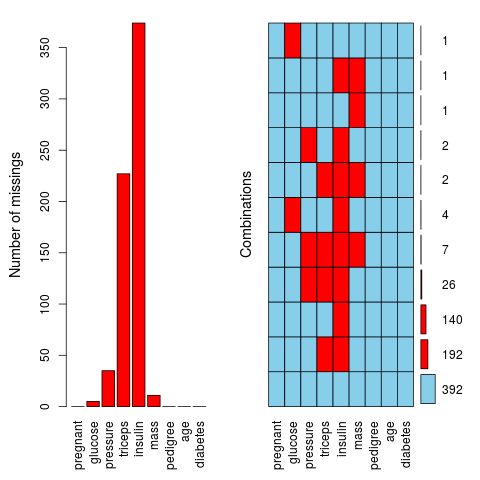

In [46]:
%%R 

VIM::aggr(PimaIndiansDiabetes2, prop = FALSE, numbers = TRUE)

In [ ]:
%%R -i complete


VIM::aggr(complete, prop = FALSE, numbers = FALSE)

In [64]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
completeR = pandas2ri.py2ri(complete)
completeR.head()



NameError: name 'PimaIndiansDiabetes2' is not defined